# Rainfall
Its been a very dry spring this year and unfotunately that affected my allotment crops. I was trying to find a decent online cumalative rainfall monitor to have an idea as to how dry it has been however I didnt manage to find one. Luckly the Enviornment agency had a free rainfall API which allows acess to past data. This project involves trying to get a gague on how dry it has been and how much more water I require to keep my plants healthy. 

In [70]:
import pandas as pd
import json
import requests


x = requests.get('https://environment.data.gov.uk/flood-monitoring/id/stations?parameter=rainfall')

data = x.json()
locations = {}

for item in data["items"]:
    try:
        lat = item["lat"]
        lon = item["long"] # some are flood monitoring stations without a name
        iden = item["stationReference"]
        locations[iden] =  [lon, lat]
    except KeyError:
        pass
    
#print(locations)

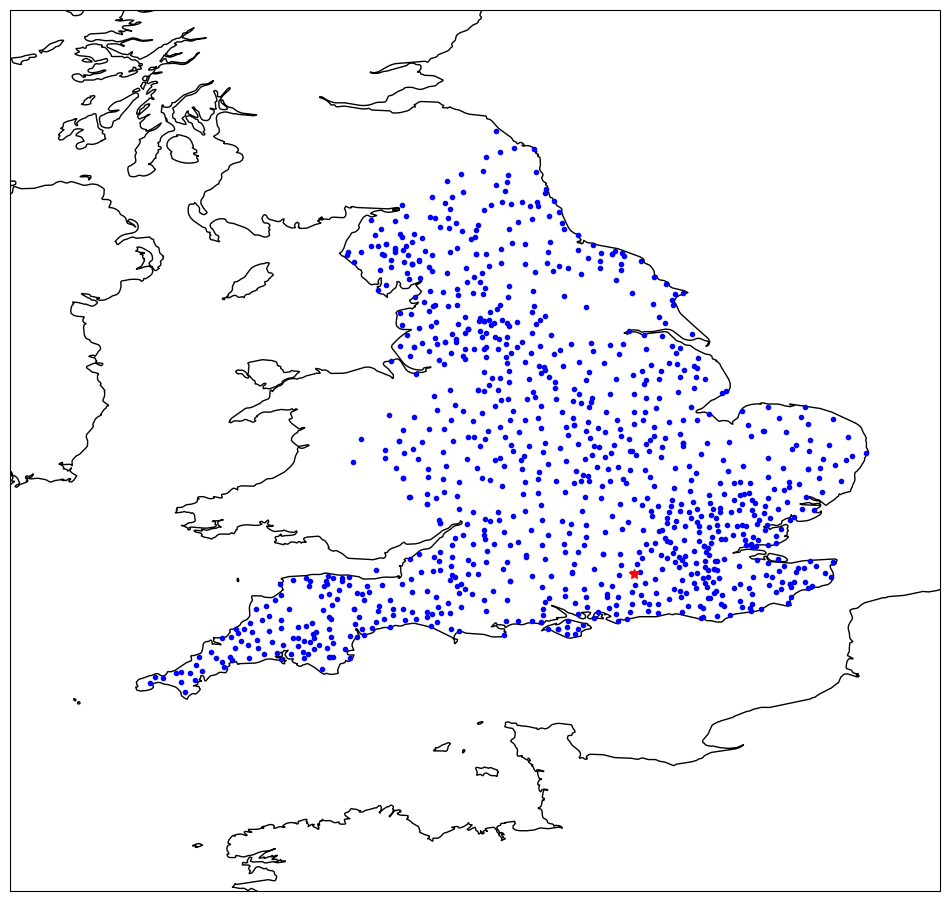

In [71]:

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

img_extent = (2.5, -7, 48 , 57)

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree(),  extent=img_extent)
ax.coastlines(resolution = "10m")

for key in locations.keys():
    loc_dat = locations[key]
    #print(loc_dat)
    ax.plot(loc_dat[0], loc_dat[1], 'bo', markersize=3, transform=ccrs.Geodetic())

guildford = [-0.63, 51.2362]
ax.plot(guildford[0], guildford[1], "r*", markersize=7, transform=ccrs.Geodetic())
plt.show()

You can see just how many rainfall stations there are. This will give a nice accurate indication of average rainfall across the Guildford area (my allotment location). 

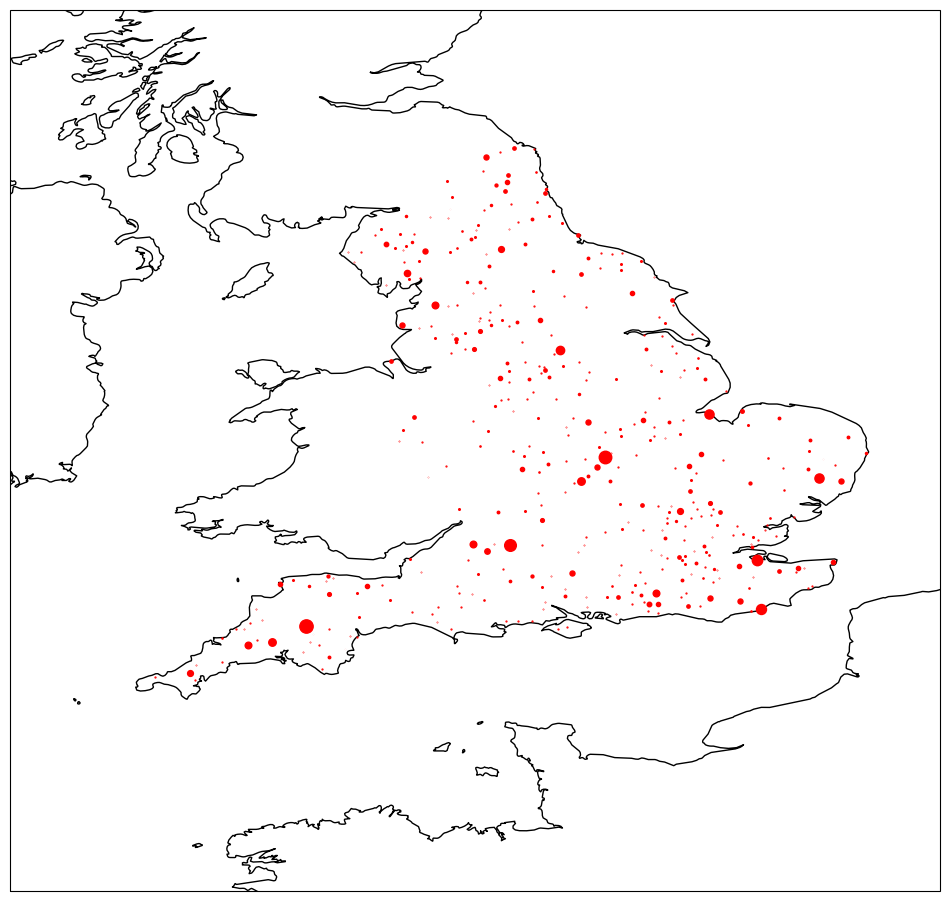

In [72]:

measures = requests.get("https://environment.data.gov.uk/flood-monitoring/id/measures?parameter=rainfall")
root_measures = measures.json()

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree(),  extent=img_extent)
ax.coastlines(resolution = "10m")

lons = []
lats = []
measures = []
for item in root_measures["items"]:
    try:
        measures.append(item["latestReading"]["value"])
        station_ref = item["stationReference"]
        loc_data = locations[station_ref]
        lats.append(loc_data[1])
        lons.append(loc_data[0])
    except:
        pass

for lat, lon, mes in zip(lats, lons, measures):
    ax.plot(lon, lat,"ro" , markersize=mes*3, transform=ccrs.PlateCarree())
    
plt.show()